In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data_results = pd.read_csv('C:/Users/NoxiePC/Pictures/DATA/results.csv')
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [3]:
data_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47917 entries, 0 to 47916
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47917 non-null  object
 1   home_team   47917 non-null  object
 2   away_team   47917 non-null  object
 3   home_score  47917 non-null  int64 
 4   away_score  47917 non-null  int64 
 5   tournament  47917 non-null  object
 6   city        47917 non-null  object
 7   country     47917 non-null  object
 8   neutral     47917 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [4]:
data_results.describe()

,home_score,away_score
count,47917.000000,47917.000000
mean,1.757873,1.181752
std,1.772538,1.399573
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [5]:
data_results[data_results['home_score'] == data_results['home_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25393,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False


In [6]:
data_results[data_results['away_score'] == data_results['away_score'].max()]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29013,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


In [7]:
data_results.sort_values(by='home_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
25393,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
8517,1971-09-13,Tahiti,Cook Islands,30,0,South Pacific Games,Papeete,French Polynesia,False
11880,1979-08-30,Fiji,Kiribati,24,0,South Pacific Games,Nausori,Fiji,False
25390,2001-04-09,Australia,Tonga,22,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
30486,2006-11-24,Sápmi,Monaco,21,1,Viva World Cup,Hyères,France,True
6545,1966-04-03,Libya,Oman,21,0,Arab Cup,Baghdad,Iraq,True
21924,1997-05-13,Kazakhstan,Guam,20,1,East Asian Games,Busan,South Korea,True
24150,2000-02-14,Kuwait,Bhutan,20,0,AFC Asian Cup qualification,Kuwait City,Kuwait,False
27304,2003-06-29,Gibraltar,Sark,19,0,Island Games,Saint Martin,Guernsey,True
24063,2000-01-26,China PR,Guam,19,0,AFC Asian Cup qualification,Hanoi,Vietnam,True


In [8]:
data_results.sort_values(by='away_score', ascending=False).head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
29013,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True
15889,1987-12-15,American Samoa,Papua New Guinea,0,20,South Pacific Games,Nouméa,New Caledonia,True
37730,2014-06-01,Darfur,Padania,0,20,CONIFA World Football Cup,Östersund,Sweden,True
27314,2003-06-30,Sark,Isle of Wight,0,20,Island Games,Saint Martin,Guernsey,True
37735,2014-06-02,Darfur,South Ossetia,0,19,CONIFA World Football Cup,Östersund,Sweden,True
13775,1983-08-22,Niue,Papua New Guinea,0,19,South Pacific Games,Apia,Western Samoa,True
27376,2003-07-07,Kiribati,Vanuatu,0,18,South Pacific Games,Lautoka,Fiji,True
17925,1991-09-15,Guam,New Caledonia,0,18,South Pacific Games,Lae,Papua New Guinea,True
35858,2012-06-05,Darfur,Provence,0,18,Viva World Cup,Erbil,Iraq,True
5866,1963-09-06,Solomon Islands,Tahiti,0,18,South Pacific Games,Suva,Fiji,True


In [9]:
data_results['result'] = data_results.apply(lambda x: 'Ganado' if x['home_score'] > x['away_score']
                                            else 'Empate' if x['home_score'] == x['away_score']
                                            else 'Perdido', axis=1)
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Ganado
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Ganado
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Ganado


In [10]:
resultados_neutral = data_results.groupby(['neutral', 'result']).size().unstack()

<Axes: xlabel='neutral'>

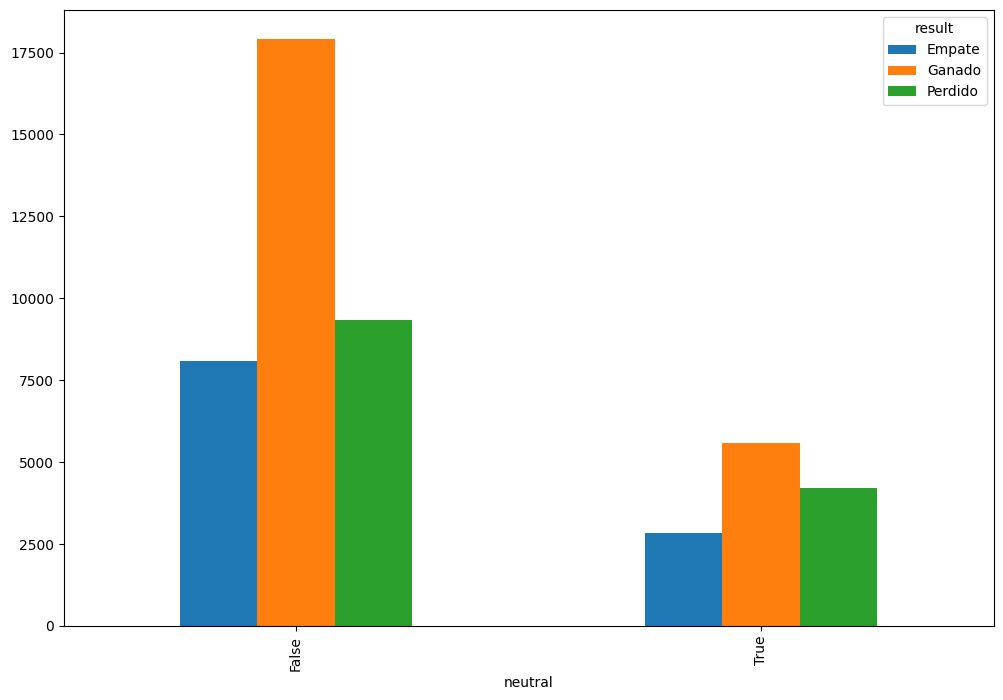

In [11]:
resultados_neutral.plot(kind='bar', figsize=(12, 8))

In [12]:
data_results['year'] = pd.to_datetime(data_results['date']).dt.year
data_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,Ganado,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Ganado,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Ganado,1876


In [13]:
partidos_por_año = data_results.groupby('year').size()
partidos_por_año.head()

year
1872    1
1873    1
1874    1
1875    1
1876    2
dtype: int64

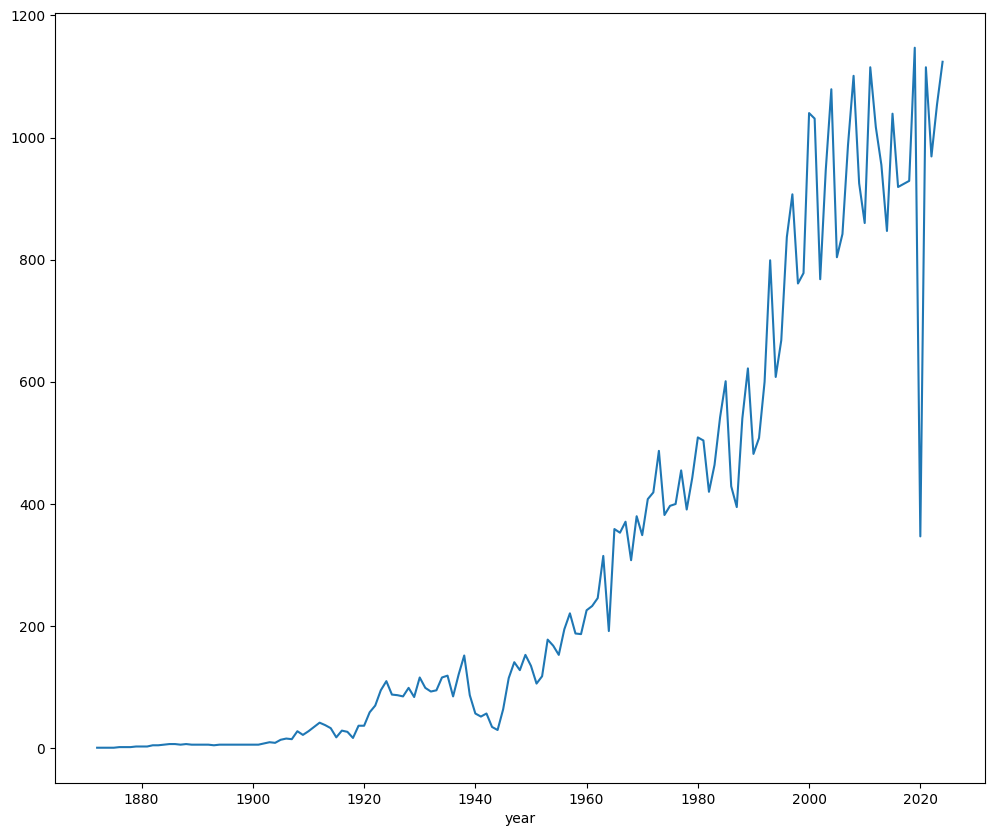

In [14]:
plt.figure(figsize=(12,10))
sns.lineplot(x=partidos_por_año.index, y=partidos_por_año.values)
plt.show()

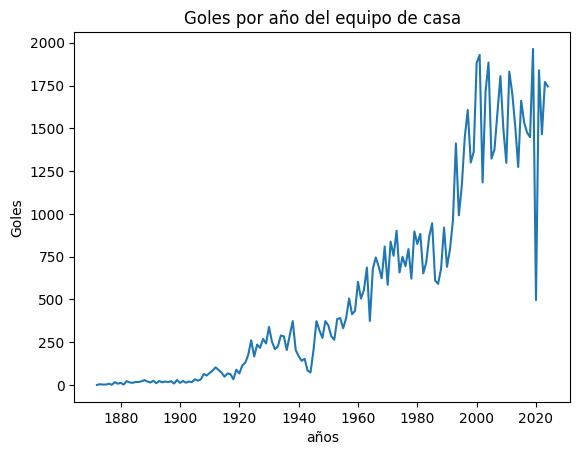

In [15]:
goles_caso_por_año = data_results.groupby('year')['home_score'].sum()
sns.lineplot(x=partidos_por_año.index, y=goles_caso_por_año.values)
plt.title('Goles por año del equipo de casa')
plt.xlabel('años')
plt.ylabel('Goles')
plt.show()

In [16]:
equipos_casa = data_results.groupby(['home_team', 'result']).size().unstack()
equipos_casa

result,Empate,Ganado,Perdido
home_team,,,
Abkhazia,8.0,11.0,3.0
Afghanistan,11.0,18.0,17.0
Albania,47.0,75.0,81.0
Alderney,1.0,1.0,46.0
Algeria,82.0,193.0,61.0
...,...,...,...
Yugoslavia,37.0,108.0,45.0
Zambia,94.0,182.0,53.0
Zanzibar,10.0,17.0,31.0


In [17]:
equipos_casa.sort_values(by='Ganado', ascending=False).head(10)

result,Empate,Ganado,Perdido
home_team,,,
Brazil,114.0,431.0,60.0
Argentina,126.0,399.0,70.0
Mexico,132.0,344.0,108.0
Germany,115.0,338.0,92.0
England,118.0,335.0,87.0
South Korea,127.0,324.0,94.0
Sweden,107.0,310.0,107.0
France,105.0,308.0,112.0
Italy,126.0,302.0,54.0


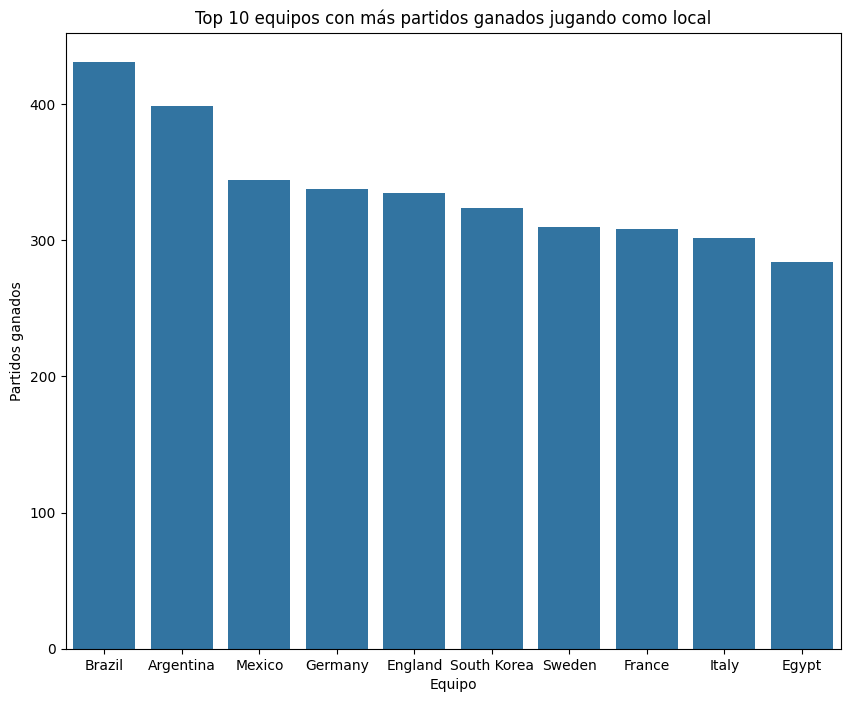

In [18]:
top_equipos_casa = equipos_casa.sort_values(by='Ganado', ascending=False).head(10)
plt.figure(figsize=(10,8))
ax = sns.barplot(x=top_equipos_casa.index, y=top_equipos_casa['Ganado'])
plt.title('Top 10 equipos con más partidos ganados jugando como local')
plt.xlabel('Equipo')
plt.ylabel('Partidos ganados')
plt.show()

In [19]:
goalscorers_data = pd.read_csv('C:/Users/NoxiePC/Pictures/DATA/goalscorers.csv')
goalscorers_data.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False


In [20]:
goalscorers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


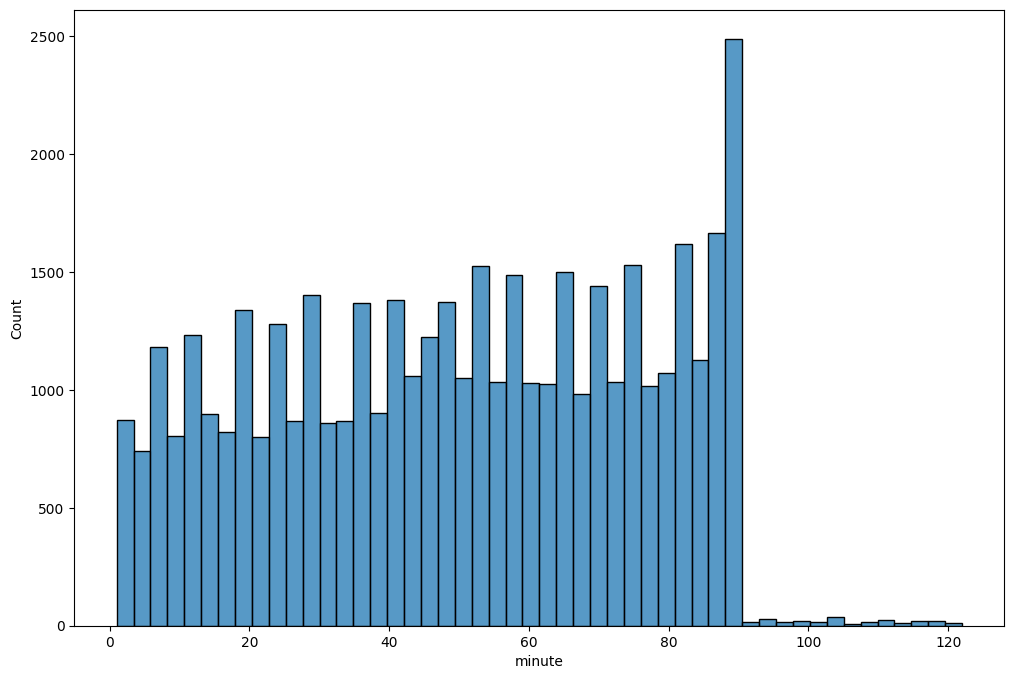

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(goalscorers_data['minute'], bins=50)
plt.show()

In [22]:
filtered_minutes= goalscorers_data['minute'].dropna()
counts, bins = np.histogram(filtered_minutes, bins=50)

max_bin_index = np.argmax(counts)
min_range = bins[max_bin_index]
max_range = bins[max_bin_index + 1]

print(f'El rango de minutos con mayor frecuencia de goles es {min_range:.2f} a {max_range:.2f}')

El rango de minutos con mayor frecuencia de goles es 88.12 a 90.54


In [23]:
counts[max_bin_index]

2486

In [24]:
penalty_conteo = goalscorers_data.groupby('penalty').size()
penalty_conteo

penalty
False    41400
True      2962
dtype: int64

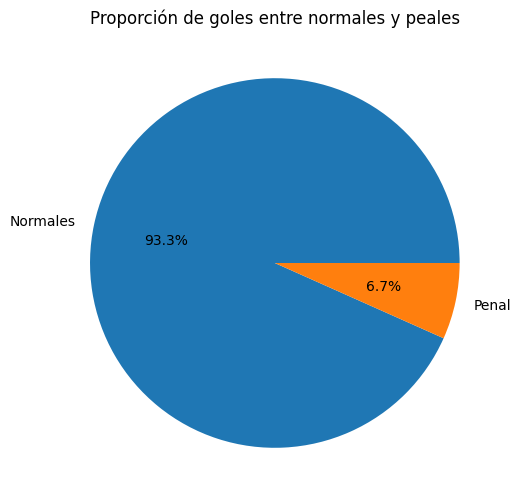

In [25]:
plt.figure(figsize=(6,6))
plt.pie(penalty_conteo, labels=['Normales', 'Penal'], autopct='%1.1f%%')
plt.title('Proporción de goles entre normales y peales')
plt.show()

In [26]:
goalscorers_data['scorer'].value_counts().head(5)

scorer
Cristiano Ronaldo     108
Robert Lewandowski     63
Romelu Lukaku          60
Harry Kane             58
Lionel Messi           55
Name: count, dtype: int64